In [1]:
# Importing Libraries

import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Dense, Flatten, Dropout, Activation
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils, normalize

Using TensorFlow backend.


In [2]:
# Importing Mnist dataset

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)


11493376/11490434 [==============================] - 6s 1us/step


In [0]:
# np.utils.to_categorical is used to convert array of labeled data(from 0 to nb_classes-1) to one-hot vector. 
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [4]:
# Build Model

model = Sequential() # A basic feed forward model
model.add(Flatten(input_shape=(1,28,28)))  # takes 28x28 and makes it 784
model.add(Dense(128, activation='relu'))  # A simple fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # output layer 10 units for 0-9 classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

val_loss, val_acc = model.evaluate(X_test, y_test)

print('Test Loss: ', val_loss)
print('Test accuracy: ', val_acc)

Epoch 1/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.2483 - acc: 0.9239
Epoch 2/10
60000/60000 [==============================] - 12s 192us/step - loss: 0.1149 - acc: 0.9648
Epoch 3/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0834 - acc: 0.9734
Epoch 4/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0663 - acc: 0.9790
Epoch 5/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.0538 - acc: 0.9822
Epoch 6/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0441 - acc: 0.9859
Epoch 7/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0376 - acc: 0.9870
Epoch 8/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0325 - acc: 0.9890
Epoch 9/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0297 - acc: 0.9896
Epoch 10/10
10000/10000 [==============================] - 1s 72us/step
Test Loss:

In [5]:
# Saving model

model.save('mnist.model')

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Loading model back

mnist_model = load_model('mnist.model')

mnist_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Make Prediction

In [7]:
predictions = mnist_model.predict(X_test)

print(predictions)

[[2.6958416e-15 9.6126102e-13 5.7093674e-13 ... 9.9999988e-01
  1.6700794e-14 1.1898840e-07]
 [3.2532439e-16 3.1977443e-10 1.0000000e+00 ... 1.3527755e-11
  2.0527356e-15 4.0968432e-16]
 [5.2814145e-11 9.9999595e-01 2.2476239e-07 ... 9.6654946e-07
  2.6490188e-06 2.7265324e-11]
 ...
 [1.5297094e-18 7.1641751e-12 2.2529245e-15 ... 2.4646541e-12
  8.9500195e-12 2.0527821e-08]
 [1.6590960e-12 4.1564736e-08 1.4911493e-12 ... 2.2683588e-13
  1.2202158e-08 1.4050785e-12]
 [9.7088483e-11 7.0206599e-18 1.2883384e-12 ... 2.3548699e-16
  4.3755302e-10 7.9704507e-12]]


In [19]:
print(np.argmax((predictions[2])))
print(np.argmax((predictions[0])))
print(np.argmax((predictions[1])))

1
7
2


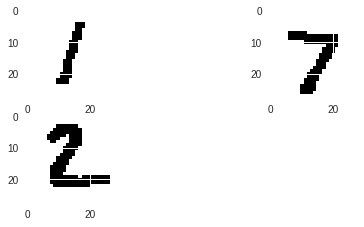

In [20]:
plt.subplot(321)
plt.imshow(X_test[2][0])
plt.subplot(322)
plt.imshow(X_test[0][0])
plt.subplot(323)
plt.imshow(X_test[1][0])
plt.show()